In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import data_analysis_tools as tools
import re
import random

## Config

In [7]:
OVERRIDE_OLD_FIXED = False
TEST = False

GENERATE_REPORTS = True
SHOW_REPORTS = True
CUT_RESULTS_TO = None
DISABLE_NEW_REPORT = False
MOVING_AVERAGE_PLOT = False

In [8]:
base_path = f"{os.getcwd()}/../reports/"

tests = [
		f"{base_path}pd_test/",
]

battery_1 = [
	# f"{base_path}battery_1/",
	### f"{base_path}battery_1_baseline_take_2/",
	# f"{base_path}battery_1_baseline_take_2_new_reports/"
]

battery_2 = [
	# f"{base_path}battery_2/B1/",
	# f"{base_path}battery_2/B1-path-grading-hack/",
	# f"{base_path}battery_2/B1-path-grading-simple/",
	# f"{base_path}battery_2/B2/",
	# f"{base_path}battery_2/B3/",
	# f"{base_path}battery_2/NB4/",
	# f"{base_path}battery_2/NB4-path-grading/",
]

battery_3= [
]

selected_paths = battery_1 + battery_2 + battery_3 +  tests

In [9]:
def prepare_data(path, selected_runs):
	for selected_run in selected_runs:
		if not os.path.isfile(f"{path}{selected_run}.pd"):
			this_path = f"{path}{selected_run}.data"
			if not os.path.exists(this_path + "_fixed") or OVERRIDE_OLD_FIXED:
				if not os.path.exists(this_path) or OVERRIDE_OLD_FIXED:
					#join data if necessary
					tools.join_data(this_path)
				tools.quote_gene(this_path)

def get_availiable_runs(filenames_list):
	selected_runs_set = set()
	for filename in filenames_list:
		found = re.findall("[0-9]+", filename)
		if len(found) > 0:
			selected_runs_set.add(found[0])
	return list(selected_runs_set)

def process_all_in_path(path):
	in_path_df_dict = dict()
	selected_runs = get_availiable_runs(os.listdir(path))
	prepare_data(path, selected_runs)
	errors = list()

	for run in selected_runs:
		print(path, run)
		run_dict = dict()
		run_dict["run_id"] = run
		run_dict["path"] = path
		with open(f"{path}{run}.conf", 'r') as f:
			for line in f.readlines():
				if tools.ANN_MODE_STRING in line:
					this_mode = line.replace(tools.ANN_MODE_STRING, "")
					run_dict["mode"] = this_mode
				elif tools.ANN_LAYERS_STRING in line:
					this_layers = line.replace(tools.ANN_LAYERS_STRING, "")
					run_dict["layers"] = this_layers
				elif tools.ANN_FITNESS_STRING in line:
					this_fitness = line.replace(tools.ANN_FITNESS_STRING, "")
					run_dict["fitness"] = this_fitness

		run_dict["df"], load_errors = tools.load_dataframe(path, run)
		in_path_df_dict[run] = run_dict
		errors.extend(load_errors)
		if TEST == True:
			return in_path_df_dict, errors

	return in_path_df_dict, errors


## Do it

c:\extincao-qpd\data_analysis/../reports/pd_test/ 1665852850
Dataframe:  c:\extincao-qpd\data_analysis/../reports/pd_test/1665852850.pd  loaded.


<Figure size 432x288 with 0 Axes>

<Figure size 864x1296 with 0 Axes>

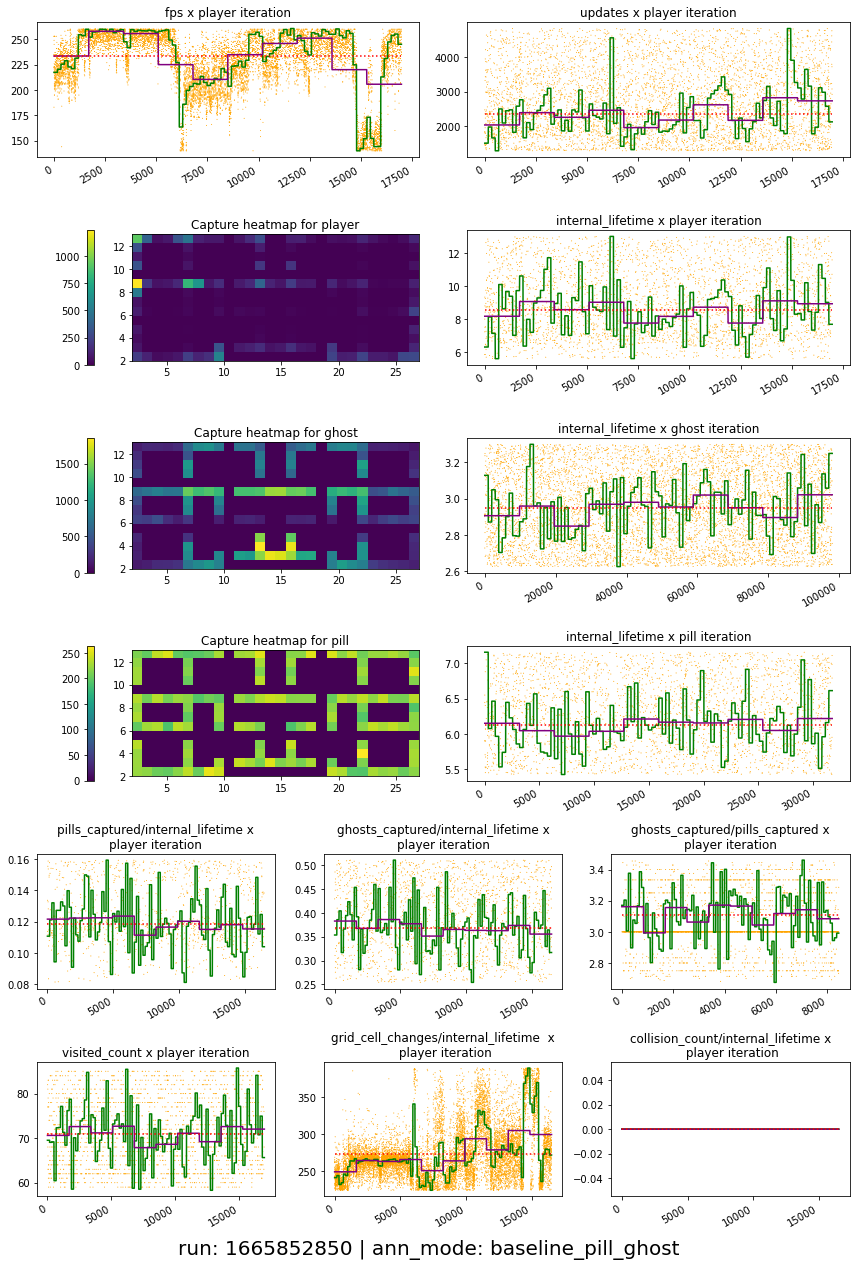

run: 1665852850 | ann_mode: baseline_pill_ghost

Total player entries: 16981
Total non_zero_internal_lifetime player entries: 16506
Total non_zero_pills_captured player entries: 8444
Total non_zero_updates player entries: 16506
Total zero_internal_lifetime player entries: 475
Total zero_updates player entries: 475
Total zero_updates player entries with internal_lifetime > 0: 0
Total zero_pill player entries: 8537
Total pill entries: 31740
Total ghost entries: 98012
------------------------------Describes :)

fps: 
count    16981.000000
mean       234.056769
std         35.845217
min         49.000000
25%        217.000000
50%        242.000000
75%        260.000000
max        308.000000
Name: fps, dtype: float64

updates: 
count    16981.000000
mean      2367.201048
std       3461.014051
min          0.000000
25%        163.000000
50%       1001.000000
75%       3234.000000
max      51074.000000
Name: updates, dtype: float64

internal_lifetime for player: 
count    16981.000000
mean   

c:\Users\guiprada\miniconda3\envs\cemeai37\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [10]:
errors = list()
paths_dict = dict()
for path in selected_paths:
	paths_dict[path], load_errors = process_all_in_path(path)
	errors.extend(load_errors)
	if TEST == True:
		break

# run count
run_count = 0
for index, path_dict in paths_dict.items():
	for _, run_dict in path_dict.items():
		run_count = run_count + 1
		if GENERATE_REPORTS:
			errors.extend(tools.generate_run_report_from_dict(run_dict, show = SHOW_REPORTS, CUT_RESULTS_TO = CUT_RESULTS_TO, disable_new_report = DISABLE_NEW_REPORT, moving_average_plot = MOVING_AVERAGE_PLOT))

print("Path count: ", len(paths_dict.keys()))
print("Run count: ", run_count)
print("Errors:\n" + str(errors))